### Importación de datos



In [179]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

df = pd.concat([tienda, tienda2, tienda3, tienda4])
df['Ingresos Netos'] = df['Precio'] - df['Costo de envío']

df.head()
#tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos Netos
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,315000.0


#1. Análisis de facturación



In [132]:
tienda_1_Ingresos_Netos = tienda['Precio'].sum() - tienda['Costo de envío'].sum()
tienda_2_Ingresos_Netos = tienda2['Precio'].sum() - tienda2['Costo de envío'].sum()
tienda_3_Ingresos_Netos = tienda3['Precio'].sum() - tienda3['Costo de envío'].sum()
tienda_4_Ingresos_Netos = tienda4['Precio'].sum() - tienda4['Costo de envío'].sum()

print(f'Total ingresos de la tienda 1: {tienda_1_Ingresos_Netos}')
print(f'Total ingresos de la tienda 2: {tienda_2_Ingresos_Netos}')
print(f'Total ingresos de la tienda 3: {tienda_3_Ingresos_Netos}')
print(f'Total ingresos de la tienda 4: {tienda_4_Ingresos_Netos}')

Total ingresos de la tienda 1: 1089502500.0
Total ingresos de la tienda 2: 1056858400.0
Total ingresos de la tienda 3: 1039503000.0
Total ingresos de la tienda 4: 983058300.0


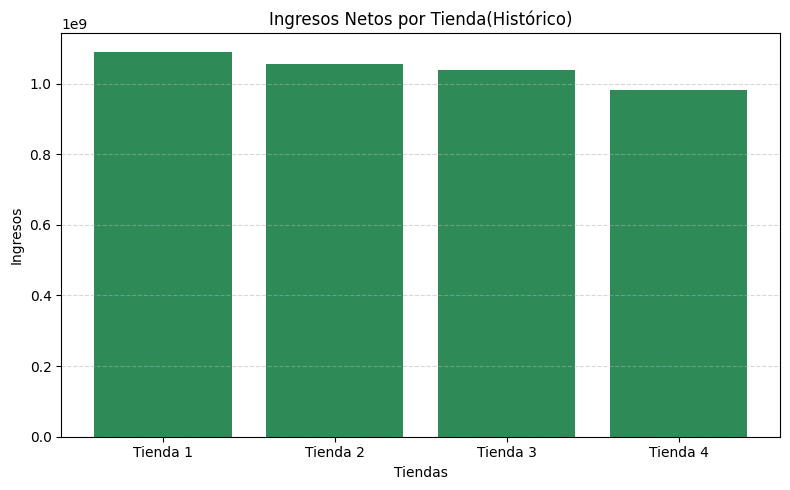

In [133]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [tienda_1_Ingresos_Netos, tienda_2_Ingresos_Netos, tienda_3_Ingresos_Netos, tienda_4_Ingresos_Netos]

plt.figure(figsize=(8,5))
plt.bar(tiendas, ingresos, color='seagreen')
plt.title('Ingresos Netos por Tienda(Histórico)')
plt.ylabel('Ingresos')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [148]:
def preparar_tienda(df):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
    df = df.dropna(subset=['Fecha de Compra'])
    df['Año'] = df['Fecha de Compra'].dt.year.astype(int)
    df['Ingresos Netos'] = df['Precio'] - df['Costo de envío']
    return df

In [149]:
preparar_tienda(tienda)
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Año,Ingresos Netos
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,2021,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,2022,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,2021,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,2022,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,2020,315000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,2021-11-15,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359,2021,1217800.0
2355,Impresora,Electrónicos,282800.0,15300.0,2023-03-18,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175,2023,267500.0
2356,Juego de mesa,Juguetes,122900.0,7200.0,2021-07-06,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250,2021,115700.0
2357,Cama box,Muebles,691300.0,35000.0,2022-05-02,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111,2022,656300.0


In [150]:
tienda['Ingresos Netos'] = tienda['Precio'] - tienda['Costo de envío']
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Año,Ingresos Netos
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,2021,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,2022,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,2021,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,2022,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,2020,315000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,2021-11-15,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359,2021,1217800.0
2355,Impresora,Electrónicos,282800.0,15300.0,2023-03-18,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175,2023,267500.0
2356,Juego de mesa,Juguetes,122900.0,7200.0,2021-07-06,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250,2021,115700.0
2357,Cama box,Muebles,691300.0,35000.0,2022-05-02,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111,2022,656300.0


Año
2020    349187000.0
2021    342901100.0
2022    299703300.0
2023     97711100.0
Name: Ingresos Netos, dtype: float64


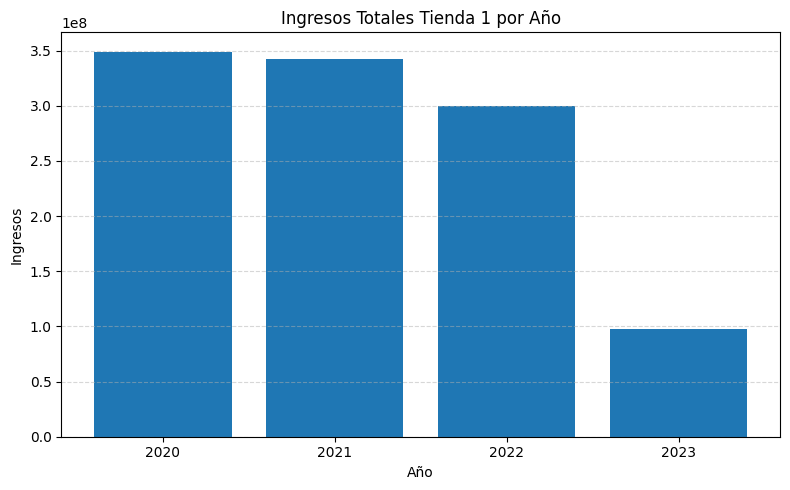

In [151]:

ingresos_por_año_tienda_1 = tienda.groupby('Año')['Ingresos Netos'].sum()
ingresos_por_año_tienda_1.index = ingresos_por_año_tienda_1.index.astype(str)
print(ingresos_por_año_tienda_1)

año = tienda['Año'].unique()
ingresos = ingresos_por_año_tienda_1.values

plt.figure(figsize=(8,5))
plt.bar(ingresos_por_año_tienda_1.index, ingresos_por_año_tienda_1.values)
plt.title('Ingresos Totales Tienda 1 por Año')
plt.ylabel('Ingresos')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Año
2020    124388300.0
2021    109111000.0
2022    136106800.0
2023     37524100.0
Name: Ingresos Netos, dtype: float64


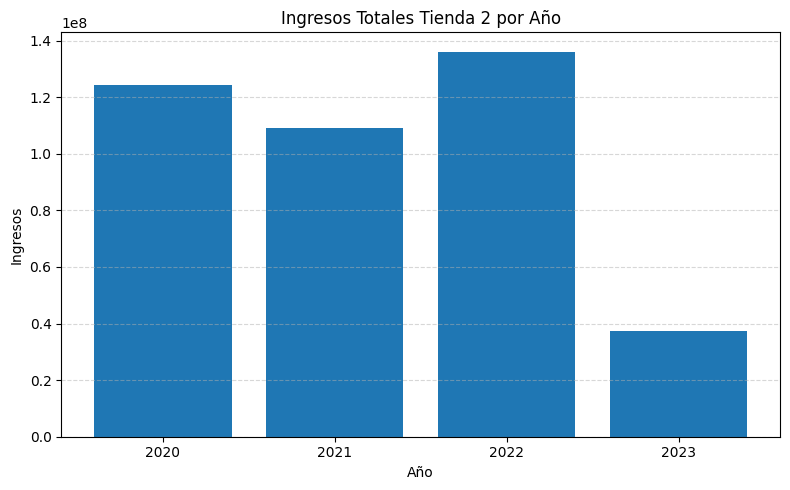

In [174]:
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], errors='coerce')

tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
tienda2['Ingresos Netos'] = tienda2['Precio'] - tienda2['Costo de envío']
ingresos_por_año_tienda_2 = tienda2.groupby('Año')['Ingresos Netos'].sum()
ingresos_por_año_tienda_2.index = ingresos_por_año_tienda_2.index.astype(int)
print(ingresos_por_año_tienda_2)

año = tienda2['Año'].unique()
ingresos = ingresos_por_año_tienda_2.values
años = ingresos_por_año_tienda_2.index.astype(str)

plt.figure(figsize=(8,5))
plt.bar(años, ingresos)
plt.title('Ingresos Totales Tienda 2 por Año')
plt.ylabel('Ingresos')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Año
2020    304639600.0
2021    343569600.0
2022    331710000.0
2023     59583800.0
Name: Ingresos Netos, dtype: float64


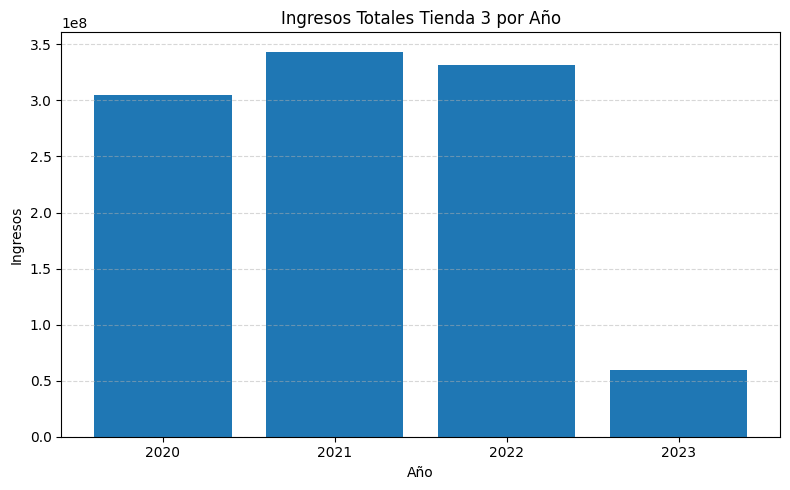

In [ ]:
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], errors='coerce')
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
tienda3['Ingresos Netos'] = tienda3['Precio'] - tienda3['Costo de envío']
ingresos_por_año_tienda_3 = tienda3.groupby('Año')['Ingresos Netos'].sum()
ingresos_por_año_tienda_3.index = ingresos_por_año_tienda_3.index.astype(str)
print(ingresos_por_año_tienda_3)

año = tienda3['Año'].unique()
ingresos = ingresos_por_año_tienda_3.values

plt.figure(figsize=(8,5))
plt.bar(ingresos_por_año_tienda_3.index, ingresos_por_año_tienda_3.values)
plt.title('Ingresos Totales Tienda 3 por Año')
plt.ylabel('Ingresos')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Año
2020    106481600.0
2021    114249100.0
2022    104859600.0
2023     23448300.0
Name: Ingresos Netos, dtype: float64
Index([2020, 2021, 2022, 2023], dtype='int64', name='Año')


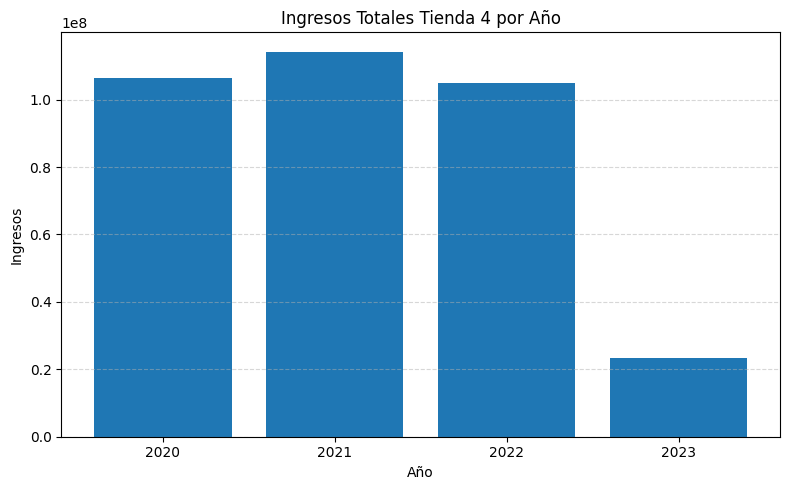

In [175]:
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], errors='coerce')
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year
tienda4['Ingresos Netos'] = tienda4['Precio'] - tienda4['Costo de envío']
ingresos_por_año_tienda_4 = tienda4.groupby('Año')['Ingresos Netos'].sum()
ingresos_por_año_tienda_4.index = ingresos_por_año_tienda_4.index.astype(int)
print(ingresos_por_año_tienda_4)
print(ingresos_por_año_tienda_4.index)

año = tienda3['Año'].unique()
ingresos = ingresos_por_año_tienda_4.values
años = ingresos_por_año_tienda_4.index.astype(str)

plt.figure(figsize=(8,5))
plt.bar(años, ingresos)
plt.title('Ingresos Totales Tienda 4 por Año')
plt.ylabel('Ingresos')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Categoría del Producto
Artículos para el hogar    5.446870e+07
Deportes y diversión       1.352861e+08
Electrodomésticos          1.254355e+09
Electrónicos               1.572114e+09
Instrumentos musicales     3.302683e+08
Juguetes                   6.958310e+07
Libros                     3.563620e+07
Muebles                    7.172106e+08
Name: Ingresos Netos, dtype: float64


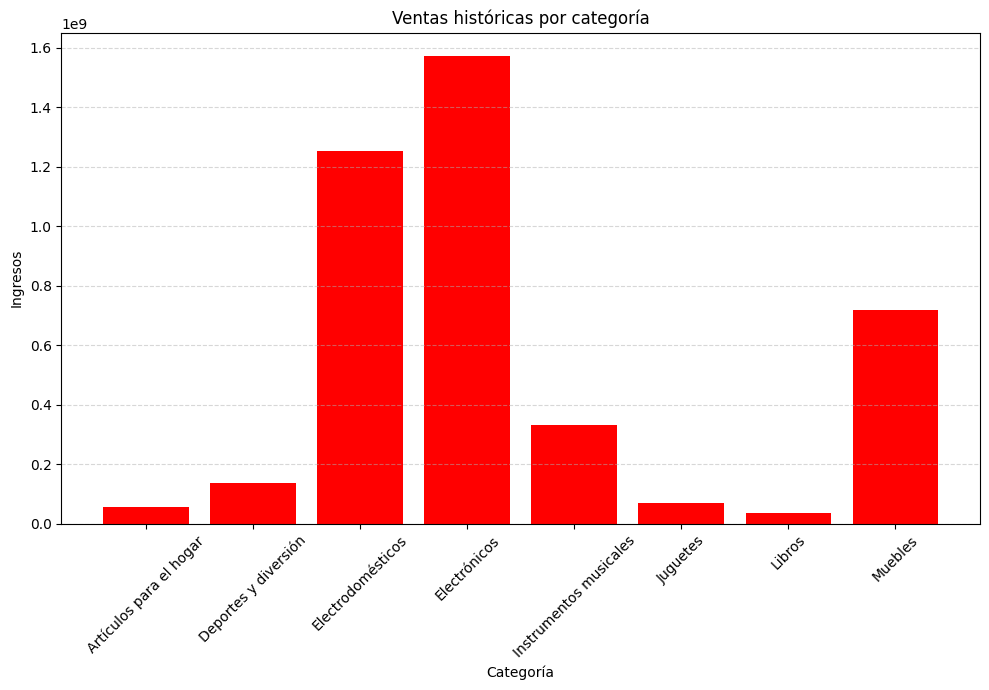

In [185]:
ventas_df = df.groupby('Categoría del Producto')['Ingresos Netos'].sum()
print(ventas_df)

plt.figure(figsize=(10, 7))
plt.bar(ventas_df.index, ventas_df.values, color='red')
plt.title('Ventas históricas por categoría')
plt.ylabel('Ingresos')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda